## Examining trends between population, religion and mental health.
***
I have always found the link between the population and the mental illness a interesting relationship. I always felt that the exponential and ever growing rise in population can lead to an evolution of traditional social structures as we know it and open the door to a new world.  

   For example, the increase in population and globalization could lead to a decrease in close knit societies. Traditionally culture, language and race created foundations of societies, but in a globalized world with constant immigration and emigration, these close knit societies could weaken.Modern civilization is changing and these changes are happening at a rate which could explain why the average person is unable to adaquetley adapt. There are record breaking cases of debilitating anxiety,  depression, ADHD and a number of other mental illnesses. 
   
  This project will examine if there truly is a definitive correlation between subcription to religion, mental health and the increase in population. Or whether due to the development of technology and social media, mental health and religious views and opinions are simply more publicized, leading to an illusion that population, mental health and religion are correlated. 
  
     The main goal of this project is to practice preprocessing and standardizing 
     datasets.This project then aims to analyze the relationships between population,
     subscription to religion and mental illness.
     
#####  In this project four datasets will be used :

1. DataWorld Population Dataset : Has populations per country from 1960-2016
2. DataWorld Religion Dataset : World Religion members in 10 year intervals from 1945-2010 per region
3. WHO Suicide Statistics : 1987-2015 Suicide statistics by country,year, age and gender
4. Kaggle Dataset of the Countries of the World and their regions
***

In [33]:
import pandas as pd
import numpy 
import seaborn as sns
import matplotlib.pyplot as plt

In [34]:
population = pd.read_csv('https://query.data.world/s/ubww64afgaabbbplxtwgemgsvk5wkz',skiprows=4)
religion = pd.read_csv('https://query.data.world/s/ea4sbqeewniesdcjefojnpawfywjxv')
mental = pd.read_csv('who_suicide_statistics.csv')
regionref = pd.read_csv('countries of the world.csv')

## Cleaning and Preprocessing

Our first task is to assess and preprocess the three datasets. This entails : looking at data types, removing/assessing missing values and gaining a better understand of the structure of our data. We will also remove unecessary columns to make visualization easier and help us better understand the relationship between the three. 

- As we can see the three datasets include very different time frames, and in different intervals. To create a more focused project we will only include intersecting time frames, which are from 1985-2010 as we can see below. 
- Standardizing the regions mentioned is another important step, the religion datasets groups countries into regions so similiarly we will merge rows of countries in the other two datasets so they are catagorized into regions as well.(Using the Kaggle Country refrence dataset)

##### KAGGLE COUNTRY REFRENCE DATA

In [35]:
regionref['Country'].nunique()

227

In [36]:
regionref.dtypes

Country                                object
Region                                 object
Population                              int64
Area (sq. mi.)                          int64
Pop. Density (per sq. mi.)             object
Coastline (coast/area ratio)           object
Net migration                          object
Infant mortality (per 1000 births)     object
GDP ($ per capita)                    float64
Literacy (%)                           object
Phones (per 1000)                      object
Arable (%)                             object
Crops (%)                              object
Other (%)                              object
Climate                                object
Birthrate                              object
Deathrate                              object
Agriculture                            object
Industry                               object
Service                                object
dtype: object

In [37]:
regionref = regionref[['Country','Region']]

In [38]:
regionref = regionref.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

In [39]:
regionref['Country'] = sorted(regionref['Country'])

##### POPULATION DATA 

In [40]:
population.dtypes

Country Name       object
Country Code       object
Indicator Name     object
Indicator Code     object
1960              float64
                   ...   
2013              float64
2014              float64
2015              float64
2016              float64
Unnamed: 61       float64
Length: 62, dtype: object

In [41]:
population['Country Name'].nunique()

264

In [42]:
population.isnull().sum()

Country Name        0
Country Code        0
Indicator Name      0
Indicator Code      0
1960                4
                 ... 
2013                2
2014                2
2015                2
2016              264
Unnamed: 61       264
Length: 62, dtype: int64

In [43]:
population = population[['Country Name','1985','1990','1995','2000','2005','2010']]

In [44]:
population['Country Name'] = sorted(population['Country Name'])

In [45]:
population['Country Name'].isin(regionref['Country']).value_counts()

True     177
False     87
Name: Country Name, dtype: int64

Here we only keep the columns that are necessary : the time periods we specified and the country name. We then concatonate regionref and population datasets so that countries and regions match up, Country name now becomes the new index.

In [46]:
populationnew = pd.concat([regionref.set_index('Country'), population.set_index('Country Name')], axis = 1, sort=True)

In [47]:
populationnew.head()

,Region,1985,1990,1995,2000,2005,2010
Afghanistan,ASIA (EX. NEAR EAST),63028.0,62148.0,80326.0,90858.0,100031.0,101597.0
Albania,EASTERN EUROPE,44597.0,54511.0,63854.0,65399.0,81223.0,84419.0
Algeria,NORTHERN AFRICA,11630498.0,12067570.0,16772522.0,19701940.0,24399948.0,27962207.0
American Samoa,OCEANIA,9745209.0,11127870.0,13042666.0,15058638.0,17912942.0,21219954.0
Andorra,WESTERN EUROPE,2964762.0,3286542.0,3187784.0,3089027.0,3011487.0,2913021.0


Here I did have some trouble at first as I didnt realize that there were whitespaces in the regionref Country column, so when I concatonated the two dataframes, identical values did not recognize each other. We then groupby region and sum the populations of each year column. 

In [48]:
aggregated = {'1985':'sum','1990':'sum','1995':'sum','2000':'sum','2005':'sum','2010':'sum'}
populationnew = populationnew.groupby(populationnew['Region']).aggregate(aggregated)

In [49]:
populationnew

,1985,1990,1995,2000,2005,2010
Region,,,,,,
ASIA (EX. NEAR EAST),6.144613e+09,6.730433e+09,7.297347e+09,7.852152e+09,8.393922e+09,8.940339e+09
BALTICS,4.473403e+08,4.956693e+08,5.453532e+08,5.942070e+08,6.413407e+08,6.882626e+08
C.W. OF IND. STATES,4.186658e+08,4.545850e+08,4.937479e+08,5.323963e+08,5.674631e+08,6.010167e+08
EASTERN EUROPE,1.750518e+09,2.002945e+09,2.280229e+09,2.579721e+09,2.910594e+09,3.289026e+09
LATIN AMER. & CARIB,1.055092e+10,1.156874e+10,1.254538e+10,1.349153e+10,1.439780e+10,1.529556e+10
NEAR EAST,4.510984e+08,5.170202e+08,5.916676e+08,6.713560e+08,7.609071e+08,8.653869e+08
NORTHERN AFRICA,1.712301e+09,1.918968e+09,2.127990e+09,2.333387e+09,2.539986e+09,2.748225e+09
NORTHERN AMERICA,3.012889e+07,3.368817e+07,3.656935e+07,4.011174e+07,4.394030e+07,4.772285e+07
OCEANIA,2.442891e+09,2.648820e+09,2.831703e+09,3.001863e+09,3.149366e+09,3.299262e+09


We can further aggregate columns to match the format of the religion dataset whose reigons are broken down into : Africa, Asia, West Hem, Europe and Middle East. First we change the index value names and then groupby index and sum the year columns

In [50]:
populationnew.index.set_value(populationnew.index,'SUB-SAHARAN AFRICA' ,'Africa')
populationnew.index.set_value(populationnew.index,'OCEANIA' ,'Africa')
populationnew.index.set_value(populationnew.index,'LATIN AMER. & CARIB' ,'West. Hem')
populationnew.index.set_value(populationnew.index,'WESTERN EUROPE' ,'Europe')
populationnew.index.set_value(populationnew.index,'EASTERN EUROPE' ,'Europe')
populationnew.index.set_value(populationnew.index,'BALTICS' ,'Europe')
populationnew.index.set_value(populationnew.index,'C.W. OF IND. STATES' ,'Europe')
populationnew.index.set_value(populationnew.index,'NORTHERN AMERICA' ,'West. Hem')
populationnew.index.set_value(populationnew.index,'ASIA (EX. NEAR EAST)' ,'Asia')
populationnew.index.set_value(populationnew.index,'NEAR EAST' ,'Asia')
populationnew.index.set_value(populationnew.index,'NORTHERN AFRICA' ,'Mideast')

In [51]:
populationnew

,1985,1990,1995,2000,2005,2010
Region,,,,,,
Asia,6.144613e+09,6.730433e+09,7.297347e+09,7.852152e+09,8.393922e+09,8.940339e+09
Europe,4.473403e+08,4.956693e+08,5.453532e+08,5.942070e+08,6.413407e+08,6.882626e+08
Europe,4.186658e+08,4.545850e+08,4.937479e+08,5.323963e+08,5.674631e+08,6.010167e+08
Europe,1.750518e+09,2.002945e+09,2.280229e+09,2.579721e+09,2.910594e+09,3.289026e+09
West. Hem,1.055092e+10,1.156874e+10,1.254538e+10,1.349153e+10,1.439780e+10,1.529556e+10
Asia,4.510984e+08,5.170202e+08,5.916676e+08,6.713560e+08,7.609071e+08,8.653869e+08
Mideast,1.712301e+09,1.918968e+09,2.127990e+09,2.333387e+09,2.539986e+09,2.748225e+09
West. Hem,3.012889e+07,3.368817e+07,3.656935e+07,4.011174e+07,4.394030e+07,4.772285e+07
Africa,2.442891e+09,2.648820e+09,2.831703e+09,3.001863e+09,3.149366e+09,3.299262e+09


In [52]:
populationnew = populationnew.groupby(populationnew.index).sum()

In [53]:
populationnew

,1985,1990,1995,2000,2005,2010
Region,,,,,,
Africa,6.947620e+09,7.581349e+09,8.155797e+09,8.701252e+09,9.209176e+09,9.728717e+09
Asia,6.595712e+09,7.247453e+09,7.889014e+09,8.523508e+09,9.154829e+09,9.805726e+09
Europe,8.297722e+09,9.164944e+09,1.003852e+10,1.091718e+10,1.180902e+10,1.276399e+10
Mideast,1.712301e+09,1.918968e+09,2.127990e+09,2.333387e+09,2.539986e+09,2.748225e+09
West. Hem,1.058105e+10,1.160243e+10,1.258195e+10,1.353164e+10,1.444174e+10,1.534329e+10


In [54]:
populationonly = populationnew.agg({'1985':'sum','1990':'sum','1995':'sum','2000':'sum','2005':'sum','2010':'sum'})

In [141]:
populationonly

1985    3.413441e+10
1990    3.751514e+10
1995    4.079327e+10
2000    4.400697e+10
2005    4.715475e+10
2010    5.038994e+10
dtype: float64

###### RELIGION DATA

In [56]:
religion.dtypes

year             int64
region          object
chrstprot       object
chrstcat        object
chrstorth       object
                ...   
othrgenpct     float64
sumreligpct    float64
totalpct       float64
totregpct      float64
version        float64
Length: 79, dtype: object

In [57]:
religion['region'].unique()

array(['Africa', 'Asia', 'Europe', 'Mideast', 'West. Hem'], dtype=object)

In [58]:
religion['year'].unique()

array([1945, 1950, 1955, 1960, 1965, 1970, 1975, 1980, 1985, 1990, 1995,
       2000, 2005, 2010])

In [59]:
religion.isnull().sum()

year           0
region         0
chrstprot      0
chrstcat       0
chrstorth      0
              ..
othrgenpct     0
sumreligpct    0
totalpct       0
totregpct      0
version        0
Length: 79, dtype: int64

In [60]:
religionew = religion[(religion.year >= 1985)& (religion.year <= 2010)]

In [61]:
religionew.head()

,year,region,chrstprot,chrstcat,chrstorth,chrstang,chrstothr,chrstgen,judorth,jdcons,...,jaingenpct,confgenpct,syncgenpct,anmgenpct,nonreligpct,othrgenpct,sumreligpct,totalpct,totregpct,version
40,1985,Africa,"51,004,398","73,386,870","19,054,140","17,519,220","67,694,251","228,658,879",0,0,...,0.0001,0.0000,0.0001,0.1611,0.0050,0.0073,0.9950,1.0000,0.0895,1.1
41,1985,Asia,"40,205,810","79,653,394","2,656,902","5,229,835","47,278,573","175,024,514",0,0,...,0.0014,0.0005,0.1685,0.0360,0.2147,0.0021,0.8161,1.0308,0.5225,1.1
42,1985,Europe,"82,115,850","260,592,119","109,218,297","26,909,075","17,622,140","496,457,481",0,0,...,0.0000,0.0000,0.0001,0.0009,0.2737,0.0172,0.7263,1.0000,0.1592,1.1
43,1985,Mideast,"205,699","2,614,480","4,772,352","214,410","3,380,557","11,187,498","3,165,480","211,032",...,0.0000,0.0000,0.0000,0.0149,0.0001,0.0121,0.9999,1.0000,0.0591,1.1
44,1985,West. Hem,"131,529,564","449,070,083","5,733,362","6,779,340","2,478,330","595,590,679","1,414,994","2,255,910",...,0.0000,0.0000,0.0153,0.0007,0.0506,0.0170,0.9642,1.0149,0.1357,1.1


In [62]:
religion2= religionew.groupby(['year']).agg({'nonreligpct': 'sum', 'sumreligpct': 'sum','totalpct':'sum',})

In [63]:
religion2
# this variable allows for analysis based on just year

,nonreligpct,sumreligpct,totalpct
year,,,
1985,0.5441,4.5015,5.0457
1990,0.5324,4.5076,5.0401
1995,0.4855,4.5525,5.0381
2000,0.4266,4.6080,5.0346
2005,0.4217,4.6130,5.0347
2010,0.4440,4.5853,5.0292


###### WHO SUICIDE DATA

In [64]:
mental.dtypes

country         object
year             int64
sex             object
age             object
suicides_no    float64
population     float64
dtype: object

In [65]:
mental.isnull().sum()

country           0
year              0
sex               0
age               0
suicides_no    2256
population     5460
dtype: int64

In [66]:
mental = mental.dropna()

In [67]:
mental.year

24       1987
25       1987
26       1987
27       1987
28       1987
         ... 
43759    2015
43760    2015
43761    2015
43762    2015
43763    2015
Name: year, Length: 36060, dtype: int64

first what amount of the countries included in mental new are also in regionref, we then drop countries that are not. We create a dictionary from the regionref dataframe so that the country was the key and the region is the value, and then used the replace method to change the countries to regions. 

In [68]:
mentalnew = mental[(mental.year >= 1985) & (mental.year <= 2010)]

In [69]:
mentalnew['country'].isin(regionref['Country']).value_counts()

True     22896
False     3840
Name: country, dtype: int64

In [70]:
mentalnew = mentalnew[mentalnew['country'].isin(regionref['Country'])]

In [71]:
df2 = regionref.set_index('Country').to_dict()['Region']
mentalnew = mentalnew.replace(df2)

In [72]:
mentalnew

,country,year,sex,age,suicides_no,population
24,EASTERN EUROPE,1987,female,15-24 years,14.0,289700.0
25,EASTERN EUROPE,1987,female,25-34 years,4.0,257200.0
26,EASTERN EUROPE,1987,female,35-54 years,6.0,278800.0
27,EASTERN EUROPE,1987,female,5-14 years,0.0,311000.0
28,EASTERN EUROPE,1987,female,55-74 years,0.0,144600.0
...,...,...,...,...,...,...
43087,C.W. OF IND. STATES,2010,male,25-34 years,235.0,2375259.0
43088,C.W. OF IND. STATES,2010,male,35-54 years,371.0,3142694.0
43089,C.W. OF IND. STATES,2010,male,5-14 years,48.0,2751752.0
43090,C.W. OF IND. STATES,2010,male,55-74 years,102.0,1036963.0


In [73]:
mentalnew = mentalnew.groupby(['year','country'])[['suicides_no']].sum().reset_index()

In [74]:
mentalnew

,year,country,suicides_no
0,1985,ASIA (EX. NEAR EAST),26239.0
1,1985,BALTICS,2435.0
2,1985,C.W. OF IND. STATES,19935.0
3,1985,EASTERN EUROPE,12831.0
4,1985,LATIN AMER. & CARIB,12724.0
...,...,...,...
267,2010,NORTHERN AFRICA,48.0
268,2010,NORTHERN AMERICA,3951.0
269,2010,OCEANIA,2420.0
270,2010,SUB-SAHARAN AFRICA,5592.0


We then changed the region names so they are standardized and match with the other datasets

In [75]:
mentalnew['country'] = mentalnew['country'].replace(['SUB-SAHARAN AFRICA','OCEANIA'], 'Africa')
mentalnew['country'] = mentalnew['country'].replace(['WESTERN EUROPE','EASTERN EUROPE','BALTICS','C.W. OF IND. STATES'], 'Europe')
mentalnew['country'] = mentalnew['country'].replace(['NORTHERN AMERICA','LATIN AMER. & CARIB'],'West. Hem')
mentalnew['country'] = mentalnew['country'].replace(['ASIA (EX. NEAR EAST)','NEAR EAST'],'Asia')
mentalnew['country'] = mentalnew['country'].replace(['NORTHERN AFRICA'],'Mideast')

In [76]:
mentalnew

,year,country,suicides_no
0,1985,Asia,26239.0
1,1985,Europe,2435.0
2,1985,Europe,19935.0
3,1985,Europe,12831.0
4,1985,West. Hem,12724.0
...,...,...,...
267,2010,Mideast,48.0
268,2010,West. Hem,3951.0
269,2010,Africa,2420.0
270,2010,Africa,5592.0


In [77]:
mentalnew = mentalnew.groupby(['year','country'])[['suicides_no']].sum().reset_index()

In [87]:
check = ['1985','1990','1995','2000','2005','2010']
mentalnew = mentalnew[mentalnew['year'].isin(check)]

In [88]:
mentalnew

,year,country,suicides_no
0,1985,Africa,4803.0
1,1985,Asia,26501.0
2,1985,Europe,69359.0
3,1985,West. Hem,15982.0
21,1990,Africa,5642.0
22,1990,Asia,24059.0
23,1990,Europe,80296.0
24,1990,West. Hem,18021.0
41,1995,Africa,5843.0
42,1995,Asia,26615.0


## Data Visualization

Basic visualization of the various distributions of data amongst the various datasets

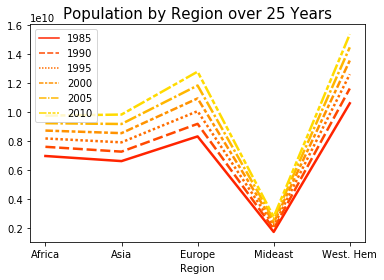

In [157]:
sns.lineplot(data=populationnew, palette='autumn', linewidth=2.5)
plt.title('Population by Region over 25 Years', fontsize=15);

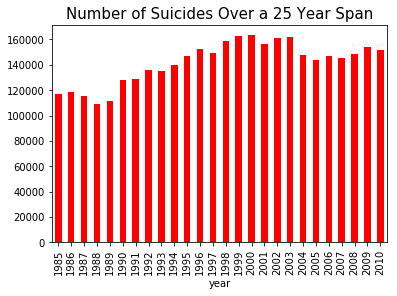

In [80]:
mentalnew.groupby('year')['suicides_no'].sum().plot(kind='bar',stacked=True, colormap ='autumn');
plt.title('Number of Suicides Over a 25 Year Span', fontsize=15);

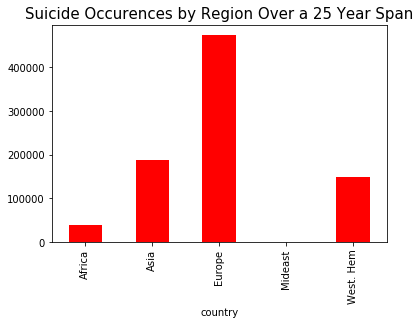

In [127]:
mentalnew.groupby('country')['suicides_no'].sum().plot(kind='bar',colormap ='autumn')
plt.title('Suicide Occurences by Region Over a 25 Year Span', fontsize=15);

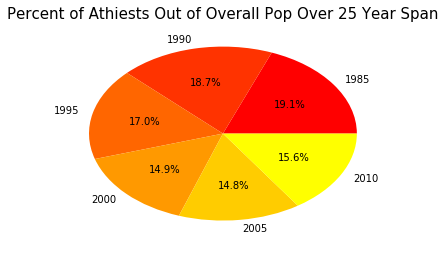

In [126]:
religion2.groupby('year')['nonreligpct'].sum().plot(kind='pie',autopct='%1.1f%%',colormap='autumn')   
plt.title('Percent of Athiests Out of Overall Pop Over 25 Year Span', fontsize=15);
plt.axis('off');

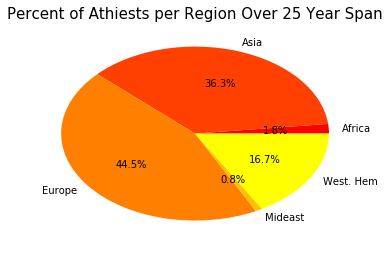

In [162]:
religionew.groupby('region')['nonreligpct'].sum().plot(kind='pie',autopct='%1.1f%%',colormap='autumn')   
plt.title('Percent of Athiests per Region Over 25 Year Span', fontsize=15);
plt.axis('off');

## Conclusion


This was a very basic visualization of data, but from these visualizations it can be seen that in the years between 1985-2010, there werent significant changes. Most significant changes during this time period were to the population, and even that was gradual. 

- The ratio of athiest to believers were virtually the same, and the number of suicides throughout the years remained relativley stable. 

- The data that we used was outdated and the world is extremley different now than it was in 2010. But these datasets dont show any significant correlation between religion, population and mental health, for the most part. 

It can be assumed that as population increases, a certain equilibrium is met in regards to things such as religion or suicides, where ratios will remain the same proprotionate to increases in population. In order to explore these hypothesis newer and more accurate data would be needed. 
